## Polygon ( draw shape on graph)

In [ ]:
!pip install --upgrade --user seaborn
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from scipy.spatial import ConvexHull

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load Data set
cols =['symboling', 'normalized-losses','make', 'fuel-type', 'aspiration', 'num-of-doors','body-style','drive-wheels','engine-location',
      'wheel-base', 'length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system',
      'bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
missing_values = ["n/a", "na", "--" ,"?"]
df_car = pd.read_csv("imports-85.data" , header= None , names=  cols , na_values = missing_values)
df_car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
def encircle(x,y, ax=None, **kw):
    if not ax: ax = plt.gca()
    p = np.c_[x,y]
    
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    

def select_high_area(col):
    x = df[df[col] > df[col].quantile(.9)].iloc[: , 1].to_numpy()
    y = df[df[col] > df[col].quantile(.9)].iloc[: , 2].to_numpy()
    return x, y   

In [4]:
df  = df_car[['fuel-type','highway-mpg', 'price' , 'num-of-cylinders']]

# fill null price with mean number
df['price'] = df['price'].fillna(df['price'].mean())

# get unique value of fuel types
fuels_label = df['fuel-type'].unique()

# decode number of cylinders
decode_num = {"num-of-cylinders": { "two": 2, "three":3, "four":4, "five":5, "six":6, "twelve":12, "eight":8}}
df.replace(decode_num, inplace=True)


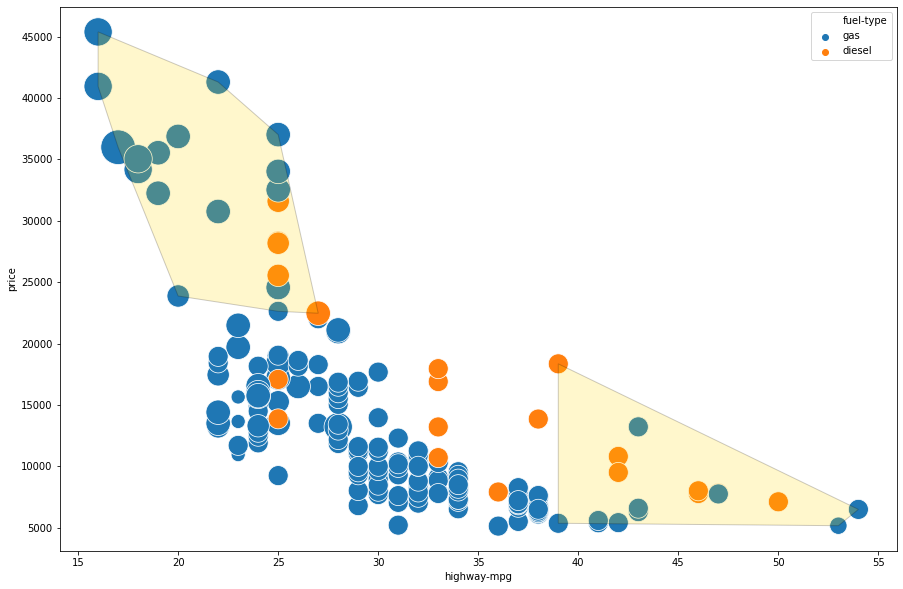

In [11]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)

scatter = sns.scatterplot( df['highway-mpg'], df['price'] , hue = df['fuel-type'] , s=df['num-of-cylinders']*100, edgecolors='b')    


# highlight area with high price cars
x,y = select_high_area('price')        
encircle(x, y, ec="k", fc="gold", alpha=0.2)       

# highlight area with high highway-mpg cars
x,y = select_high_area('highway-mpg')        
encircle(x, y, ec="k", fc="gold", alpha=0.2)       

plt.show()
